# Data Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split


In [4]:
# sindhu
path = r'drive/My Drive/FAI/Code/dataset'

In [5]:
file_list = os.listdir(path)
print(file_list)

['Telco_customer_churn_population.xlsx', 'Telco_customer_churn_services.xlsx', 'Telco_customer_churn_status.xlsx', 'Telco_customer_churn_demographics.xlsx', 'Telco_customer_churn_location.xlsx', 'Telco_customer_churn.xlsx']


In [6]:
import pandas as pd

demographics_df = pd.read_excel(path + '/Telco_customer_churn_demographics.xlsx')
location_df = pd.read_excel(path + '/Telco_customer_churn_location.xlsx')
population_df = pd.read_excel(path + '/Telco_customer_churn_population.xlsx')
services_df = pd.read_excel(path + '/Telco_customer_churn_services.xlsx')
status_df = pd.read_excel(path + '/Telco_customer_churn_status.xlsx')

# df = pd.read_excel(path + '/Telco_customer_churn.xlsx')


In [7]:
# Merge on CustomerID
merged_df = pd.merge(demographics_df, location_df, on='Customer ID')
merged_df = pd.merge(merged_df, services_df, on='Customer ID')
merged_df = pd.merge(merged_df, status_df, on='Customer ID')


# Merge Population data
merged_df = pd.merge(merged_df, population_df, on='Zip Code')
df = merged_df


<ipython-input-7-df131a552093>:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Count_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = pd.merge(merged_df, status_df, on='Customer ID')


In [8]:
df.columns

Index(['Customer ID', 'Count_x', 'Gender', 'Age', 'Under 30', 'Senior Citizen',
       'Married', 'Dependents', 'Number of Dependents', 'Count_y', 'Country',
       'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude',
       'Count_x', 'Quarter_x', 'Referred a Friend', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Count_y', 'Quarter_y', 'Satisfaction Score',
       'Customer Status', 'Churn Label', 'Churn Value', 'Churn Score', 'CLTV',
   

In [9]:
# Identify and remove duplicate columns
duplicate_columns = []
for col in df.columns:
    if col.endswith('_x') or col.endswith('_y'):
        duplicate_columns.append(col)

print("Duplicate columns:", duplicate_columns)

df.drop(columns=duplicate_columns, inplace=True)

Duplicate columns: ['Count_x', 'Count_y', 'Count_x', 'Quarter_x', 'Count_y', 'Quarter_y']


In [10]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married',
       'Dependents', 'Number of Dependents', 'Country', 'State', 'City',
       'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Referred a Friend',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Customer Status', 'Churn Label',
       'Churn Value', 'Churn Score', 'CLTV', 'Churn Category', 'Churn Reason',
       'ID', 'Population'],
      dtype='objec

# Data Cleaning
The below steps are followed:
1. Check and fill in for the missing values
2. Check and remove duplicate rows

In [11]:
# 1. Checking for any missing values
print(df.isnull().sum())

Customer ID                             0
Gender                                  0
Age                                     0
Under 30                                0
Senior Citizen                          0
Married                                 0
Dependents                              0
Number of Dependents                    0
Country                                 0
State                                   0
City                                    0
Zip Code                                0
Lat Long                                0
Latitude                                0
Longitude                               0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                     

In [12]:
# We can see that Churn Reason and Churn Category has a lot of missing values.
# This is expected because for customers who have not churned, there isn't any reason.
# So we will fill in the missing values with either NA or Not churned based on their churn status


df.loc[(df['Churn Reason'].isnull()) & (df['Churn Value'] == 1), 'Churn Reason'] = 'NA'
df.loc[(df['Churn Reason'].isnull()) & (df['Churn Value'] == 0), 'Churn Reason'] = 'Not Churned'

df.loc[(df['Churn Category'].isnull()) & (df['Churn Value'] == 1), 'Churn Category'] = 'NA'
df.loc[(df['Churn Category'].isnull()) & (df['Churn Value'] == 0), 'Churn Category'] = 'Not Churned'

# Checking for missing values to verify
print(df.isnull().sum())

Customer ID                          0
Gender                               0
Age                                  0
Under 30                             0
Senior Citizen                       0
Married                              0
Dependents                           0
Number of Dependents                 0
Country                              0
State                                0
City                                 0
Zip Code                             0
Lat Long                             0
Latitude                             0
Longitude                            0
Referred a Friend                    0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security          

In [13]:
# 2. Checking for any duplicate rows
df = df.drop_duplicates()

# Exploratory Data Analysis

In [14]:
df.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason,ID,Population
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data,21,68701
1,4737-AQCPU,Male,39,No,No,Yes,No,0,United States,California,...,3,Stayed,No,0,42,4658,Not Churned,Not Churned,21,68701
2,5043-TRZWM,Female,32,No,No,No,No,0,United States,California,...,5,Joined,No,0,34,3503,Not Churned,Not Churned,21,68701
3,8165-CBKXO,Male,35,No,No,Yes,Yes,3,United States,California,...,3,Stayed,No,0,46,5748,Not Churned,Not Churned,21,68701
4,9979-RGMZT,Female,20,Yes,No,No,No,0,United States,California,...,3,Stayed,No,0,38,5545,Not Churned,Not Churned,21,68701


<ipython-input-15-05d7b4ecebb9>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(


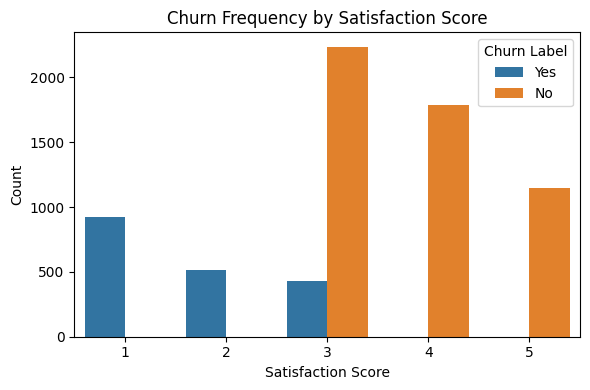

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your actual dataframe
# df = pd.read_csv('your_dataset.csv')  # If you need to load the dataset

# Group by 'Satisfaction Score' and 'Churn Label', and count the occurrences
grouped_df = df.groupby(['Satisfaction Score', 'Churn Label']).size().reset_index(name='Count')

# Create a bar graph
plt.figure(figsize=(6, 4))
barplot = sns.barplot(
    data=grouped_df,
    x='Satisfaction Score',
    y='Count',
    hue='Churn Label',
    ci=None  # Remove the confidence interval lines
)

# Set the title and labels
barplot.set_title('Churn Frequency by Satisfaction Score')
barplot.set_xlabel('Satisfaction Score')
barplot.set_ylabel('Count')

# Display the plot
plt.tight_layout()
plt.show()

<ipython-input-16-0dbd3593832f>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(


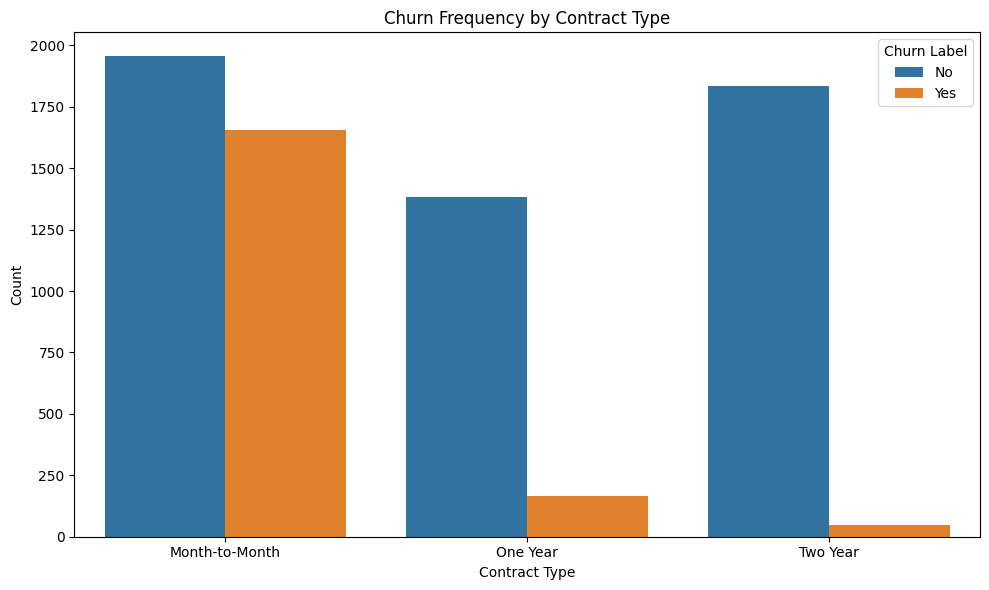

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your actual dataframe
# df = pd.read_csv('your_dataset.csv')  # If you need to load the dataset

# Group by 'Contract' and 'Churn Label', and count the occurrences
grouped_df = df.groupby(['Contract', 'Churn Label']).size().reset_index(name='Count')

# Create a bar graph
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    data=grouped_df,
    x='Contract',
    y='Count',
    hue='Churn Label',
    ci=None  # Remove the confidence interval lines
)

# Set the title and labels
barplot.set_title('Churn Frequency by Contract Type')
barplot.set_xlabel('Contract Type')
barplot.set_ylabel('Count')

# Display the plot
plt.tight_layout()
plt.show()


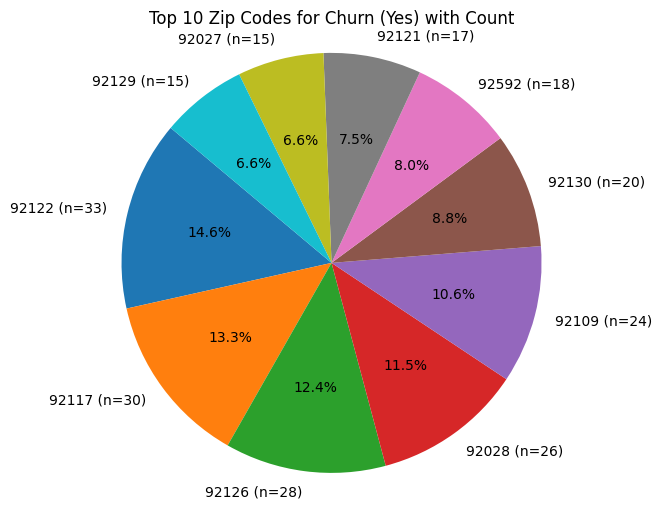

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your actual dataframe
# df = pd.read_csv('your_dataset.csv')  # Load your dataset

# Filter the dataset for churn label 'Yes'
churn_yes_df = df[df['Churn Label'] == 'Yes']

# Group by 'Zip Code' and count the occurrences
grouped_df = churn_yes_df.groupby('Zip Code').size().reset_index(name='Count')

# Sort and select the top 10 zip codes
top_zip_codes = grouped_df.sort_values(by='Count', ascending=False).head(10)

# Create labels that include both zip code and count
labels = [f'{row["Zip Code"]} (n={row["Count"]})' for index, row in top_zip_codes.iterrows()]

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(top_zip_codes['Count'], labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Zip Codes for Churn (Yes) with Count')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular

# Display the plot
plt.show()


<ipython-input-18-f5321aaa2549>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df["Churn Label"] == 'No']['Total Charges'],
<ipython-input-18-f5321aaa2549>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df["Churn Label"] == 'Yes']['Total Charges'],


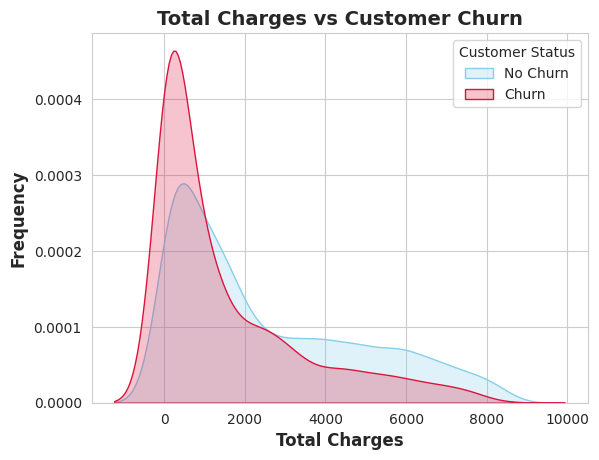

In [18]:
sns.set_style("whitegrid")

# Customers who didn't churn
sns.kdeplot(data=df[df["Churn Label"] == 'No']['Total Charges'],
            color="SkyBlue", shade=True, label="No Churn")

# Customers who did churn
sns.kdeplot(data=df[df["Churn Label"] == 'Yes']['Total Charges'],
            color="Crimson", shade=True, fill=True, label="Churn")


plt.legend(title="Customer Status")

plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.xlabel('Total Charges', fontsize=12, fontweight='bold')
plt.title('Total Charges vs Customer Churn', fontsize=14, fontweight='bold')

# Display the plot
plt.show()

# Feature Engineering

In this step, we will analyse and choose the most relevant features to train our model. We can create a summary of each feature to understand which of the features are more important to predict the churn outcome.


In [19]:
# 1. Create feature summary
feature_summary = []

for feature in df.columns:
    unique_values = np.unique(df[feature].astype(str))
    feature_summary.append({
        "column_name": feature,
        'unique_value_count': len(unique_values),
        'total_count': len(df),
        'unique_values': unique_values,
        'Datatype': df[feature].dtype
    })

print(pd.DataFrame(feature_summary))

                          column_name  unique_value_count  total_count  \
0                         Customer ID                7043         7043   
1                              Gender                   2         7043   
2                                 Age                  62         7043   
3                            Under 30                   2         7043   
4                      Senior Citizen                   2         7043   
5                             Married                   2         7043   
6                          Dependents                   2         7043   
7                Number of Dependents                  10         7043   
8                             Country                   1         7043   
9                               State                   1         7043   
10                               City                1106         7043   
11                           Zip Code                1626         7043   
12                           Lat Long 

**Findings:**
1. We can see that features like `CustomerID`, `Country`, `State` are redundant features. They are either unique for each observation or same for all of the observations. There is also `Lat Long` which seems to be a combination of `Latitude` and `Longitude`. They do not contribute much to our prediction.
  - TODO: We can remove them to simplify our model.
2. We have few binary features like `Gender`, `Under 30`, `Senior Citizen`, `Married`, `Dependents`, `Referred a Friend`, `Phone Service`, `Multiple Lines`, `Internet Service`, `Online Security`, `Online Backup`, `Device Protection Plan`, `Premium Tech Support`, `Streaming TV`, `Streaming Movies`, `Streaming Music`, `Unlimited Data`, and `Paperless Billing`.
  - TODO: We can use label encoding for use in modelling where the algorithms need numerical inputs.
3. We also have features with multiple categories like `Internet Type`, `Contract`, `Payment Method`, `Customer Status`
  - TODO: We can use one-hot encoding for use in modelling where the algorithms need numerical inputs.
4. There are also continuous numerical features like `Age`, `Number of Dependents`, `Number of Referrals`, `Tenure in Months`, `Avg Monthly Long Distance Charges`, `Avg Monthly GB Download`, `Monthly Charge`, `Total Charges`, `Total Refunds`, `Total Extra Data Charges`, `Total Long Distance Charges`, `Total Revenue`, `Satisfaction Score`, `CLTV`, `Population`
  - TODO: These features might need scaling. Certain algorithms like Logistic Regression, SVMs, Neural Networks assume the features are on the same level.
  - TODO: The field type of `Total Charges` is an object type but should be numerical. We can perform data cleaning step to convert this to float.
5. There are also high cardinality categorical features like `City`, `Zip Code`.
  - TODO: These may require special handling like target encoding or clustering.
6. As per the official documentation on the IBM website, the features `Churn Label`, `Churn Value`, `Churn Score`, `Customer Status`, `Churn Category` and `Churn Reason` are all directly associated with the outcome of customer churn.
  - TODO: We will use `Churn Value` as our target variable. We will remove the remaining features to prevent data leakage.

In [20]:
# Removing irrelevant features
columns_to_remove = ['Customer ID', 'Country', 'State', 'Lat Long']
# columns_to_remove = ['CustomerID', 'Country', 'State', 'Lat Long']
df = df.drop(columns=columns_to_remove)

# Removing features directly associated with the target variable to prevent Data Leakage
columns_to_remove = ['Churn Category', 'Churn Reason', 'Customer Status', 'Churn Score', 'Churn Label']
# columns_to_remove = ['Churn Reason', 'Churn Score', 'Churn Label']
df = df.drop(columns=columns_to_remove)

print(df.head())

   Gender  Age Under 30 Senior Citizen Married Dependents  \
0    Male   78       No            Yes      No         No   
1    Male   39       No             No     Yes         No   
2  Female   32       No             No      No         No   
3    Male   35       No             No     Yes        Yes   
4  Female   20      Yes             No      No         No   

   Number of Dependents         City  Zip Code  Latitude  ...  Total Charges  \
0                     0  Los Angeles     90022  34.02381  ...          39.65   
1                     0  Los Angeles     90022  34.02381  ...        5016.65   
2                     0  Los Angeles     90022  34.02381  ...          75.55   
3                     3  Los Angeles     90022  34.02381  ...        3708.40   
4                     0  Los Angeles     90022  34.02381  ...         633.45   

  Total Refunds  Total Extra Data Charges  Total Long Distance Charges  \
0           0.0                        20                         0.00   
1   

In [21]:
# Data Type Conversion for 'TotalCharges'
def change_dtype(x):
    try:
        return float(x)
    except ValueError:
        return 0

df['Total Charges'] = df['Total Charges'].apply(lambda x: change_dtype(x))
print(df['Total Charges'].dtype)

float64


In [22]:
# Handling the high-cardinality categorical feature 'City'

# Choosing to drop for now, since one hot encoding will increase the dimensionality drastically.
# Label encoding will also be ideal since it imposes artifical ordinal relationships
# df.drop(['City'], axis=1, inplace=True)

# Frequency encoding
city_freq = df['City'].value_counts()
df['City'] = df['City'].map(city_freq)

In [23]:
# Handling the high-cardinality categorical feature 'Zip Code'


# Frequency encoding
zip_freq = df['Zip Code'].value_counts()
df['Zip Code'] = df['Zip Code'].map(zip_freq)

# Target encoding
# mean_churn_per_zip = df.groupby('Zip Code')['Churn Value'].mean()
# df['Zip_Code_Target_Enc'] = df['Zip Code'].map(mean_churn_per_zip)

# df.drop('Zip Code', axis=1, inplace=True)

In [24]:
# Handling Categorical Features

# Label Encoding for binary variables
label_cols = [col for col in df.columns if df[col].nunique() == 2 and df[col].dtype == 'object' and col != 'Churn Value']

# Apply label encoding
label_encoder = LabelEncoder()
for col in label_cols:
    df[col] = label_encoder.fit_transform(df[col])


label_encoder = LabelEncoder()
for col in label_cols:
    df[col] = label_encoder.fit_transform(df[col])

# One-Hot Encoding for non-binary variables
one_hot_cols = [col for col in df.columns if df[col].nunique() > 2 and df[col].dtype == 'object']
df = pd.get_dummies(df, columns=one_hot_cols)

print(df.head())

   Gender  Age  Under 30  Senior Citizen  Married  Dependents  \
0       1   78         0               1        0           0   
1       1   39         0               0        1           0   
2       0   32         0               0        0           0   
3       1   35         0               0        1           1   
4       0   20         1               0        0           0   

   Number of Dependents  City  Zip Code  Latitude  ...  Internet Type_Cable  \
0                     0   293         5  34.02381  ...                    0   
1                     0   293         5  34.02381  ...                    0   
2                     0   293         5  34.02381  ...                    0   
3                     3   293         5  34.02381  ...                    1   
4                     0   293         5  34.02381  ...                    0   

   Internet Type_DSL  Internet Type_Fiber Optic  Internet Type_None  \
0                  1                          0                

In [25]:
# Calculate variances of numerical columns
numerical_variances = df.select_dtypes(include=['int64', 'float64']).var()

# Choose a 75th percentile as the threshold
threshold_variance = numerical_variances.quantile(0.75)

print("Variance threshold:", threshold_variance)

Variance threshold: 509.62294271530305


In [26]:
all_numerical_vars = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if col != 'Churn Value']

high_variance_vars = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if df[col].var() > threshold_variance and col != 'Churn Value']

In [27]:
all_numerical_vars

['Gender',
 'Age',
 'Under 30',
 'Senior Citizen',
 'Married',
 'Dependents',
 'Number of Dependents',
 'City',
 'Zip Code',
 'Latitude',
 'Longitude',
 'Referred a Friend',
 'Number of Referrals',
 'Tenure in Months',
 'Phone Service',
 'Avg Monthly Long Distance Charges',
 'Multiple Lines',
 'Internet Service',
 'Avg Monthly GB Download',
 'Online Security',
 'Online Backup',
 'Device Protection Plan',
 'Premium Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Streaming Music',
 'Unlimited Data',
 'Paperless Billing',
 'Monthly Charge',
 'Total Charges',
 'Total Refunds',
 'Total Extra Data Charges',
 'Total Long Distance Charges',
 'Total Revenue',
 'Satisfaction Score',
 'CLTV',
 'ID',
 'Population']

In [28]:
high_variance_vars

['City',
 'Tenure in Months',
 'Monthly Charge',
 'Total Charges',
 'Total Extra Data Charges',
 'Total Long Distance Charges',
 'Total Revenue',
 'CLTV',
 'ID',
 'Population']

In [29]:
# Scale the high variance numerical columns
scaler = StandardScaler()
df[all_numerical_vars] = scaler.fit_transform(df[all_numerical_vars])

# Split Data into train and test set

In [30]:
df.columns

Index(['Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married', 'Dependents',
       'Number of Dependents', 'City', 'Zip Code', 'Latitude', 'Longitude',
       'Referred a Friend', 'Number of Referrals', 'Tenure in Months',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Avg Monthly GB Download', 'Online Security',
       'Online Backup', 'Device Protection Plan', 'Premium Tech Support',
       'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data',
       'Paperless Billing', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Churn Value', 'CLTV', 'ID',
       'Population', 'Offer_None', 'Offer_Offer A', 'Offer_Offer B',
       'Offer_Offer C', 'Offer_Offer D', 'Offer_Offer E',
       'Internet Type_Cable', 'Internet Type_DSL', 'Internet Type_Fiber Optic',
       'Internet Type_None', 'Contract_M

In [31]:
X = df.drop(['Churn Value'], axis=1)
y = df['Churn Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Training set: (5634, 54) (5634,)
Test set: (1409, 54) (1409,)


# Modelling Techniques

## 1. Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

In [33]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Accuracy: 0.9545777146912704
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1032
           1       0.93      0.89      0.91       377

    accuracy                           0.95      1409
   macro avg       0.95      0.94      0.94      1409
weighted avg       0.95      0.95      0.95      1409

ROC-AUC Score: 0.9923997080171899


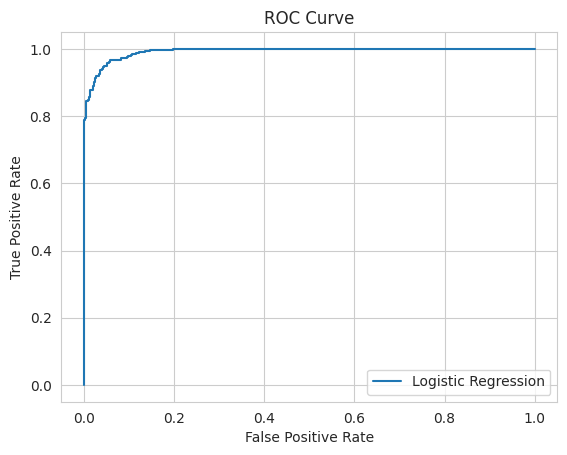

In [34]:
# Predictions
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:,1]

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print(classification_report(y_test, y_pred))

# ROC-AUC Score
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [35]:
feature_importance = pd.DataFrame(log_reg.coef_[0], index=X_train.columns, columns=['Coefficient']).sort_values('Coefficient', ascending=False)

print(feature_importance)

                                   Coefficient
Monthly Charge                        0.858277
Contract_Month-to-Month               0.838985
Offer_Offer A                         0.734977
Referred a Friend                     0.618289
Number of Dependents                  0.432889
Senior Citizen                        0.402361
Streaming Music                       0.389030
Total Long Distance Charges           0.372325
Offer_Offer E                         0.362288
Internet Type_Cable                   0.293971
Zip Code                              0.285428
Payment Method_Mailed Check           0.282973
City                                  0.168425
Married                               0.164350
Paperless Billing                     0.138702
Payment Method_Bank Withdrawal        0.132938
Total Extra Data Charges              0.116366
Population                            0.101356
Total Revenue                         0.096915
ID                                    0.069092
Internet Type

## 3. SVM

In [36]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

In [37]:
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)

SVC(probability=True)

Accuracy: 0.9524485450674237
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1032
           1       0.95      0.87      0.91       377

    accuracy                           0.95      1409
   macro avg       0.95      0.93      0.94      1409
weighted avg       0.95      0.95      0.95      1409

ROC-AUC Score: 0.989785742191516


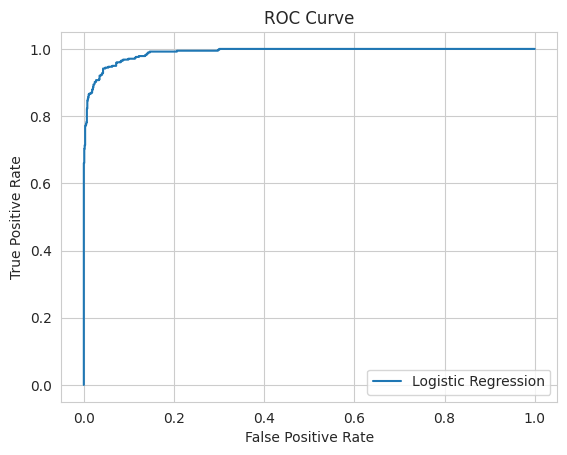

In [38]:
# Predictions
y_pred = svm_model.predict(X_test)
y_pred_proba = svm_model.predict_proba(X_test)[:, 1]

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print(classification_report(y_test, y_pred))

# ROC-AUC Score
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [39]:
param_grid = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

grid_search = GridSearchCV(SVC(probability=True), param_grid, cv=5, verbose=2, n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Find the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters: {'kernel': 'linear'}
Best Cross-Validation Score: 0.962903919773176


Accuracy: 0.9595457771469127
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1032
           1       0.94      0.90      0.92       377

    accuracy                           0.96      1409
   macro avg       0.95      0.94      0.95      1409
weighted avg       0.96      0.96      0.96      1409

ROC-AUC Score: 0.9923483025928896


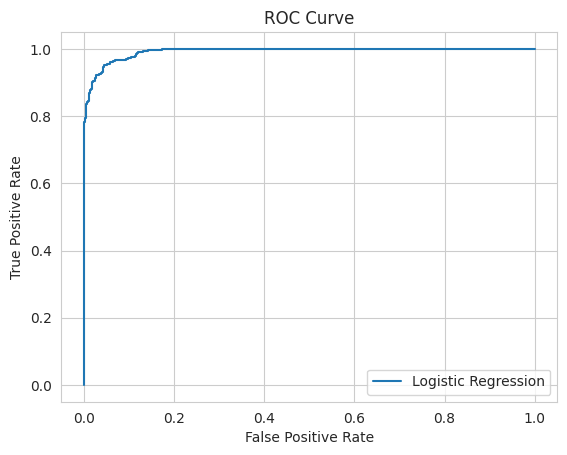

In [40]:
best_svm_model = grid_search.best_estimator_

# Predictions
y_pred = best_svm_model.predict(X_test)
y_pred_proba = best_svm_model.predict_proba(X_test)[:, 1]

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print(classification_report(y_test, y_pred))

# ROC-AUC Score
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Deep Neural Net

In [41]:
# Uncomment the below line and run to install required packages if you have not done so

!pip install torch torchvision matplotlib tqdm

In [42]:
# Setup
import torch
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from tqdm import trange
from torch.utils.data import TensorDataset, DataLoader

In [43]:
%matplotlib inline
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

# Set random seed for reproducibility
seed = 1234
# cuDNN uses nondeterministic algorithms, set some options for reproducibility
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
torch.manual_seed(seed)

In [44]:
# Convert arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Create TensorDatasets
train_data = TensorDataset(X_train_tensor, y_train_tensor)
test_data = TensorDataset(X_test_tensor, y_test_tensor)

In [45]:
batch_size = 32
torch.manual_seed(seed)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=True)

In [46]:
import torch.nn as nn
import torch.nn.functional as F


class ChurnPredictionModel_singleLayer(nn.Module):
    def __init__(self, input_size):
        super(ChurnPredictionModel_singleLayer, self).__init__()
        self.fc1 = nn.Linear(input_size, 1)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        return x

class ChurnPredictionModel_twoLayers(nn.Module):
    def __init__(self, input_size):
        super(ChurnPredictionModel_twoLayers, self).__init__()
        self.fc1 = nn.Linear(input_size, 16)
        self.fc2 = nn.Linear(16, 1)
        self.dropout = nn.Dropout(p=0.1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.sigmoid(self.fc2(x))
        return x

class ChurnPredictionModel_threeLayers(nn.Module):
    def __init__(self, input_size):
        super(ChurnPredictionModel_threeLayers, self).__init__()
        self.fc1 = nn.Linear(input_size, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 1)
        self.dropout = nn.Dropout(p=0.1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.sigmoid(self.fc3(x))
        return x

# Initialize weights
def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.uniform_(m.weight, 0, 0.05)
        m.bias.data.fill_(0.01)

In [47]:
# Initialize the model
input_size = X.shape[1]
model_singleLayer = ChurnPredictionModel_singleLayer(input_size)
model_singleLayer.apply(init_weights)

model_twoLayer = ChurnPredictionModel_twoLayers(input_size)
model_twoLayer.apply(init_weights)

model_threeLayer = ChurnPredictionModel_threeLayers(input_size)
model_threeLayer.apply(init_weights)

ChurnPredictionModel_threeLayers(
  (fc1): Linear(in_features=54, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=1, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
)

In [48]:
model_singleLayer

ChurnPredictionModel_singleLayer(
  (fc1): Linear(in_features=54, out_features=1, bias=True)
)

In [49]:
model_twoLayer

ChurnPredictionModel_twoLayers(
  (fc1): Linear(in_features=54, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=1, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
)

In [50]:
criterion = nn.BCELoss()

def train_one_epoch(train_loader, model, device, optimizer):
    model.train()
    losses = []

    for i, (X_batch, y_batch) in enumerate(train_loader):
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        # ------------------
        # Write your implementation here.
        optimizer.zero_grad()                               # Zero the gradients
        output = model(X_batch).squeeze()                           # Forward pass

        if output.dim() == 0:
            output = output.unsqueeze(0)

        loss = F.binary_cross_entropy(output, y_batch)      # criterion(output.squeeze(), y_batch)         # Compute the loss
        loss.backward()                                     # Backward pass
        optimizer.step()                                    # Update the model parameters
        losses.append(loss.item())
        # ------------------
    return losses

In [51]:
def test_one_epoch(test_loader, model, device):
    model.eval()
    test_loss = 0
    num_correct = 0

    with torch.no_grad():
        for i, (X_batch, y_batch) in enumerate(test_loader):
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            # ------------------
            # Write your implementation here.

            output = model(X_batch).squeeze()
            pred = output.round()       # (y_pred.squeeze() > 0.5).float()

            if output.dim() == 0:
              output = output.unsqueeze(0)

            loss = F.binary_cross_entropy(output, y_batch)    # criterion(y_pred.squeeze(), y_batch)

            test_loss += loss.item()
            num_correct += pred.eq(y_batch.view_as(pred)).sum().item()

            # ------------------

    test_loss /= len(test_loader.dataset)
    return test_loss, num_correct

In [52]:
# Hyperparameters
lr = 0.001
max_epochs=20
gamma = 0.95

In [53]:
models = [model_singleLayer, model_twoLayer, model_threeLayer]
layers = ["Single Layer", "Two Layers", "Three Layers"]

for i, model in enumerate(models):
    # Instantiate optimizer (model was created in previous cell)
    # optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    optimizer = torch.optim.NAdam(model.parameters(), lr=lr)

    train_losses = []
    test_losses = []
    test_correct = []
    for epoch in trange(max_epochs, leave=True, desc=layers[i]):
        train_loss = train_one_epoch(train_loader, model, DEVICE, optimizer)
        test_loss, num_correct = test_one_epoch(test_loader, model, DEVICE)

        # Record results
        train_losses.extend(train_loss)
        test_losses.append(test_loss)
        test_correct.append(num_correct)

    print(f"{layers[i]} Test accuracy: {test_correct[-1]/len(test_loader.dataset)}")

Single Layer: 100%|██████████| 20/20 [00:41<00:00,  2.07s/it]


Single Layer Test accuracy: 0.9524485450674237


Two Layers: 100%|██████████| 20/20 [00:20<00:00,  1.04s/it]


Two Layers Test accuracy: 0.9559971611071683


Three Layers: 100%|██████████| 20/20 [00:19<00:00,  1.01it/s]

Three Layers Test accuracy: 0.9595457771469127


In [58]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, roc_curve

# Modified test method to return predictions and labels
def test_one_epoch_modified(test_loader, model, device):
    model.eval()
    test_loss = 0
    num_correct = 0
    all_predictions = []
    all_probabilities = []  # To store probability scores for ROC AUC
    all_labels = []

    with torch.no_grad():
        for i, (X_batch, y_batch) in enumerate(test_loader):
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch).squeeze()
            preds = outputs.round()

            # If preds is a 0-d array (single value), unsqueeze it to make it iterable
            if preds.dim() == 0:
                preds = preds.unsqueeze(0)

            if outputs.dim() == 0:
                outputs = outputs.unsqueeze(0)

            loss = F.binary_cross_entropy_with_logits(outputs, y_batch)
            test_loss += loss.item()
            num_correct += preds.eq(y_batch.view_as(preds)).sum().item()

            # Convert to numpy and check if the result is a scalar
            preds_np = preds.cpu().numpy()
            preds_np = preds_np if preds_np.ndim > 0 else [preds_np.item()]
            outputs_np = torch.sigmoid(outputs).cpu().numpy()
            outputs_np = outputs_np if outputs_np.ndim > 0 else [outputs_np.item()]
            y_batch_np = y_batch.cpu().numpy()
            y_batch_np = y_batch_np if y_batch_np.ndim > 0 else [y_batch_np.item()]

            all_predictions.extend(preds_np)
            all_probabilities.extend(outputs_np)
            all_labels.extend(y_batch_np)

    test_loss /= len(test_loader.dataset)
    accuracy = num_correct / len(test_loader.dataset)
    return test_loss, accuracy, all_predictions, all_probabilities, all_labels


In [64]:
# Function to calculate and print the metrics
def print_metrics(labels, predictions, probabilities):
    # Calculate accuracy
    accuracy = accuracy_score(labels, predictions)

    # Calculate ROC-AUC score
    roc_auc = roc_auc_score(labels, probabilities)

    # Calculate ROC curve values
    fpr, tpr, thresholds = roc_curve(labels, probabilities)


    # Output the calculated metrics
    print(f"Accuracy: {accuracy}")
    print(classification_report(labels, predictions))
    print(f"ROC-AUC Score: {roc_auc}")


    # Plotting ROC curve
    # plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, label=f'ANN (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()


Single Layer: 100%|██████████| 20/20 [00:17<00:00,  1.13it/s]


Results for Single Layer:
Accuracy: 0.9552874378992193
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1032
         1.0       0.94      0.89      0.91       377

    accuracy                           0.96      1409
   macro avg       0.95      0.94      0.94      1409
weighted avg       0.95      0.96      0.95      1409

ROC-AUC Score: 0.9923483025928896


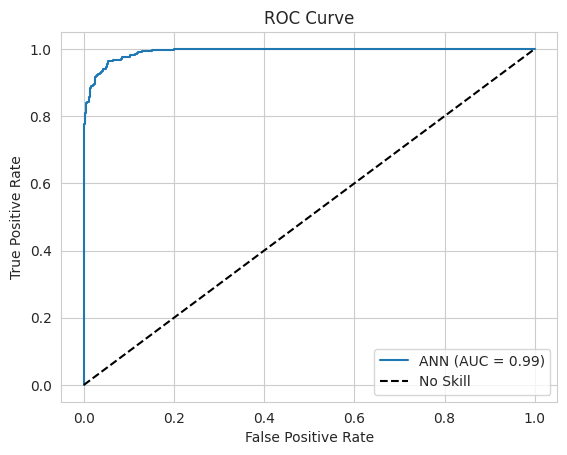

-----------------------------------------------------


Two Layers: 100%|██████████| 20/20 [00:20<00:00,  1.03s/it]


Results for Two Layers:
Accuracy: 0.957416607523066
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1032
         1.0       0.95      0.89      0.92       377

    accuracy                           0.96      1409
   macro avg       0.95      0.94      0.94      1409
weighted avg       0.96      0.96      0.96      1409

ROC-AUC Score: 0.9913433265478173


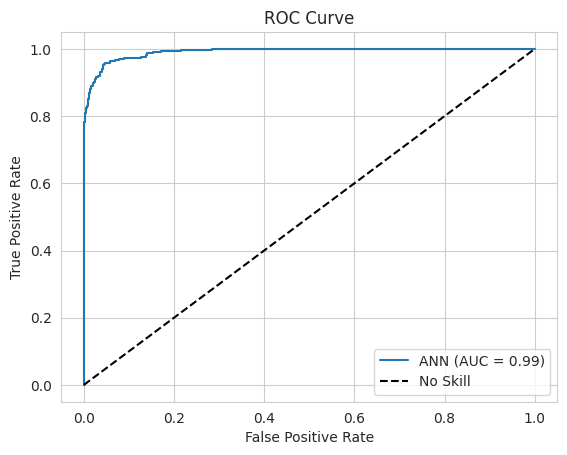

-----------------------------------------------------


Three Layers: 100%|██████████| 20/20 [00:21<00:00,  1.08s/it]


Results for Three Layers:
Accuracy: 0.957416607523066
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97      1032
         1.0       0.93      0.90      0.92       377

    accuracy                           0.96      1409
   macro avg       0.95      0.94      0.95      1409
weighted avg       0.96      0.96      0.96      1409

ROC-AUC Score: 0.988274422717085


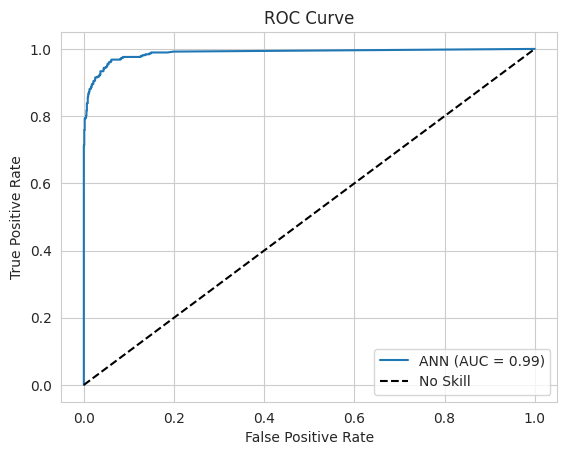

-----------------------------------------------------


In [65]:
from tqdm import tqdm


models = [model_singleLayer, model_twoLayer, model_threeLayer]
layers = ["Single Layer", "Two Layers", "Three Layers"]

for i, model in enumerate(models):
    optimizer = torch.optim.NAdam(model.parameters(), lr=lr)

    # Initialize variables to store metrics for the final epoch
    final_test_loss = None
    final_accuracy = None
    final_all_predictions = None
    final_all_probabilities = None
    final_all_labels = None

    # Train model for max_epochs
    for epoch in tqdm(range(max_epochs), desc=layers[i]):
        train_loss = train_one_epoch(train_loader, model, DEVICE, optimizer)
        test_loss, accuracy, all_predictions, all_probabilities, all_labels = test_one_epoch_modified(test_loader, model, DEVICE)

        # Store metrics from the final epoch
        if epoch == max_epochs - 1:
            final_test_loss = test_loss
            final_accuracy = accuracy
            final_all_predictions = all_predictions
            final_all_probabilities = all_probabilities
            final_all_labels = all_labels

    # After training is complete, print the metrics for the last epoch
    print(f"Results for {layers[i]}:")
    print_metrics(final_all_labels, final_all_predictions, final_all_probabilities)
    print("-----------------------------------------------------")